<a href="https://colab.research.google.com/github/Bryan-Az/Neurobytes/blob/notebooks/mlops/notebooks/tracks_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Track Related Data

## Authentication and Data Loading

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
million_song_glink = 'https://drive.google.com/file/d/1EL4vYhO4A0Cgm8akBgAfDrWOGvtF6Xvo/view?usp=sharing'
million_song_name = 'million_songs.zip'

In [32]:
user_preferences_glink = 'https://drive.google.com/file/d/1543swVIvYq6iXnDh2VEIobJVsKmwbFB0/view?usp=drive_link'
user_preferences_name = 'user_preferences.csv'

In [33]:
def get_link_content(link, name):
  file_id = link.split('/')[-2]
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(name)

In [34]:
get_link_content(million_song_glink, million_song_name)

In [35]:
get_link_content(user_preferences_glink, user_preferences_name)

In [40]:
million_songs = pd.read_csv(million_song_name)
user_preferences = pd.read_csv(user_preferences_name)

In [41]:
million_songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


# Connecting User Preferences to the Million Song Dataset
The user preferences dataset has a songID index which matches the index in the million song dataset.

In [43]:
user_preferences = user_preferences.drop(['level_0'], axis=1)

In [52]:
user_preferences.head()

,songID,artist,song,link,text,userID
0,41424,Lenny Kravitz,Heaven Help,/l/lenny+kravitz/heaven+help_20082584.html,There comes a time \r\nTo be free of the hear...,0
1,50907,Rihanna,Willing To Wait,/r/rihanna/willing+to+wait_20409353.html,Baby slow down just hear me out \r\nThere's s...,0
2,5409,Eric Clapton,One Chance,/e/eric+clapton/one+chance_20051429.html,Without wishing to cause you any pain \r\nI g...,0
3,50902,Rihanna,Right Now,/r/rihanna/right+now_21050296.html,Tomorrow way too far away \r\nAnd we can't ge...,0
4,1908,Bosson,Over The Mountains,/b/bosson/over+the+mountains_20023045.html,I've made up my mind I've packed my bags \r\n...,0


In [55]:
user_preferences.shape

(5568, 6)

# User Preferences

We have user data for 10 synthetically generated users. It represents the user's preferences. It was created using by selection at random for each user the top n (random for each user, from 5-10) similar tracks to a randomly sampled song from a randomly sampled set of songs (songs_per_users is random for each user, between 50-100).

For example, the amount of songs in a user's preference library is calculated by multiplying the top_n value by the songs_per_users value.

## Sample User Preferences

In [62]:
random_user = user_preferences.sample(n=1)['userID'].values[0]
random_user_preferences = user_preferences[user_preferences['userID'] == random_user]

In [63]:
random_user_preferences

,songID,artist,song,link,text,userID
3168,41621,Lil Wayne,Bring It Back Ft. Mannie Fresh,/l/lil+wayne/bring+it+back+ft+mannie+fresh_206...,"[Mannie Fresh] \r\nLadies and gentlemen, \r\...",6
3169,41621,Lil Wayne,Bring It Back Ft. Mannie Fresh,/l/lil+wayne/bring+it+back+ft+mannie+fresh_206...,"[Mannie Fresh] \r\nLadies and gentlemen, \r\...",6
3170,41665,Lil Wayne,I Got Some Money On Me,/l/lil+wayne/i+got+some+money+on+me_20982217.html,[Lil Wayne] \r\nI got some money on me \r\nI...,6
3171,41663,Lil Wayne,I Don't Like The Look Of It,/l/lil+wayne/i+dont+like+the+look+of+it_208927...,Ok I'm sippin' on the syrup \r\nGot a nigga m...,6
3172,11542,Lil Wayne,Carter Ii,/l/lil+wayne/carter+ii_20367823.html,"So you made it, this far, \r\nWe upstairs, I ...",6
...,...,...,...,...,...,...
3651,31877,Etta James,Give It Up,/e/etta+james/give+it+up_21063306.html,"Give it up, give it up, you know what's on my ...",6
3652,29428,Demi Lovato,Get Back,/d/demi+lovato/get+back_20747552.html,Don't walk away like you always do \r\nThis t...,6
3653,22362,Zac Brown Band,Overnight,/z/zac+brown+band/overnight_21022038.html,I don't know how much more of this that I can ...,6
3654,19378,Tom Jones,I Wanna Get Back With You,/t/tom+jones/i+wanna+get+back+with+you+feat+to...,"I was a fool to say the things I said, \r\nI ...",6


## User Preferences: Artists

<Axes: >

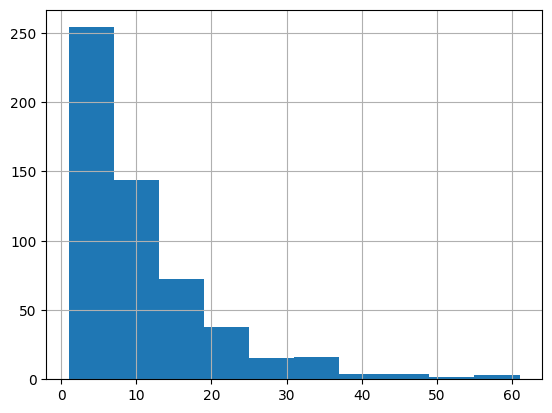

In [48]:
user_preferences.groupby(by=['artist']).count().mean(axis=1).hist()

In the above plot, we can see that a majority of artists make 0-20 appearances across all 10 users, on average. Some artists are outliers and appear up to 60 times!

<Axes: >

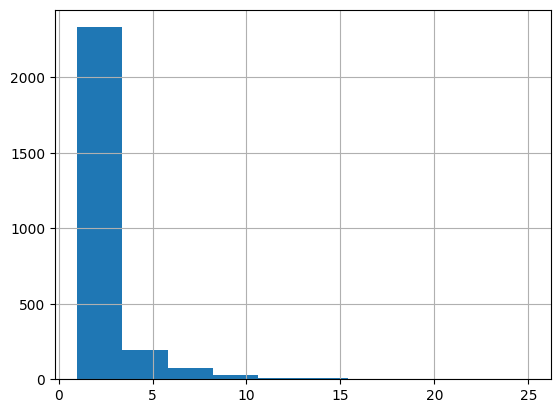

## User Preferences: Top Artists

Songs are not as commonly distributed across users as artists. This makes sense as artist's tend to have multiple songs and albums, whereas songs are unique to a single artist, so it's less likely users have songs in common - but they may have artists in common.

**Our neural network model can be evaluated based on whether the song recommendations it makes perform well when using top-k categorical classification accuracy along the user preferences.**

In [82]:
# lets visualize the top 10 artist across all userIDs
for user in user_preferences.groupby(by='userID'):
  print('User: ', user[0])
  print('###############')
  display(user_preferences[user_preferences['userID'] == user[0]].groupby(by=['artist']).count().mean(axis=1).sort_values(ascending=False).head(10))
  print('###############')

User:  0
###############


artist
Foreigner          13.0
Cliff Richard       9.0
Luther Vandross     8.0
Cheap Trick         8.0
Leann Rimes         7.0
Reba Mcentire       7.0
One Direction       7.0
Lea Salonga         7.0
Usher               6.0
Leo Sayer           6.0
dtype: float64

###############
User:  1
###############


artist
Westlife           13.0
John Legend        10.0
Air Supply          9.0
Foreigner           9.0
Michael Bolton      9.0
Luther Vandross     8.0
Cliff Richard       8.0
George Michael      7.0
Chris Brown         7.0
Usher               7.0
dtype: float64

###############
User:  2
###############


artist
Fleetwood Mac            9.0
Michael Jackson          8.0
Modern Talking           6.0
Westlife                 6.0
Engelbert Humperdinck    6.0
Glen Campbell            5.0
Cher                     5.0
Etta James               4.0
Leann Rimes              4.0
Roxette                  4.0
dtype: float64

###############
User:  3
###############


artist
Fleetwood Mac       8.0
Barbra Streisand    7.0
Rihanna             6.0
Mc Hammer           6.0
Luther Vandross     6.0
Eric Clapton        6.0
Lionel Richie       5.0
Mariah Carey        5.0
Kiss                5.0
Westlife            5.0
dtype: float64

###############
User:  4
###############


artist
Westlife           7.0
Michael Jackson    7.0
Diana Ross         6.0
Chaka Khan         6.0
Neil Diamond       6.0
Usher              6.0
Luther Vandross    5.0
Miley Cyrus        5.0
Leann Rimes        5.0
Santana            5.0
dtype: float64

###############
User:  5
###############


artist
Planetshakers            9.0
Luther Vandross          9.0
Engelbert Humperdinck    7.0
Bonnie Raitt             6.0
Puff Daddy               6.0
Offspring                5.0
Demi Lovato              5.0
Janis Joplin             5.0
Dusty Springfield        5.0
Usher                    5.0
dtype: float64

###############
User:  6
###############


artist
Foreigner         9.0
Diana Ross        7.0
Lil Wayne         7.0
Vince Gill        7.0
One Direction     7.0
Jennifer Lopez    6.0
Neil Diamond      6.0
Cliff Richard     6.0
Dolly Parton      6.0
Cher              6.0
dtype: float64

###############
User:  7
###############


artist
Westlife                 10.0
Bonnie Raitt             10.0
'n Sync                   8.0
Luther Vandross           8.0
Michael Jackson           8.0
Willie Nelson             7.0
Cheap Trick               7.0
Dusty Springfield         7.0
Jackson Browne            7.0
Engelbert Humperdinck     7.0
dtype: float64

###############
User:  8
###############


artist
Bonnie Raitt       13.0
Avril Lavigne      12.0
Foreigner          11.0
Kenny Rogers        9.0
Rihanna             9.0
Michael Bolton      8.0
Usher               8.0
Westlife            7.0
Michael Jackson     7.0
Virgin Steele       7.0
dtype: float64

###############
User:  9
###############


artist
Avril Lavigne      8.0
Gucci Mane         7.0
Evanescence        5.0
Adele              5.0
Z-Ro               5.0
Luther Vandross    5.0
Lionel Richie      5.0
Demi Lovato        5.0
'n Sync            4.0
Kyla               4.0
dtype: float64

###############
